# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [58]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
weather_df = pd.DataFrame(cities)
# Print the city count to confirm sufficient count
len(cities)
weather_df.columns = ["City"]
#weather_df['Cloudiness'] = ""
#weather_df['Country'] = ""
weather_df['Date'] = ""
#weather_df['Humidity'] = ""
#weather_df['Lat'] = ""
#weather_df['Lng'] = ""
#weather_df['Max Temp'] = ""
#weather_df['Wind Speed'] = ""

len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {"units": "imperial", "appid": api_key, "q": ""}

counter = 0
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    time.sleep(1)
    if counter >= 50 :
        counter = 1
    else:
        counter = counter + 1
    series = int((index/50)+1)
    params["q"] = row["City"] 
    print(f"Processing Record {counter} of Set {series} | {cities[index]}")
    try:      
        params["q"] = row["City"] 

        weather_response = requests.get(url, params=params).json()
        #print(f"Processing Record {counter} of Set {series} | {weather_response['name']}.")
    
        weather_df.loc[index, 'Cloudiness'] = weather_response['clouds']["all"]
        weather_df.loc[index, 'Country'] = weather_response['sys']["country"]
        weather_df.loc[index, 'Date'] = weather_response['dt']
        weather_df.loc[index, 'Humidity'] = weather_response['main']["humidity"]
        weather_df.loc[index, 'Lat'] = weather_response['coord']["lat"]
        weather_df.loc[index, 'Lng'] = weather_response['coord']["lon"]
        weather_df.loc[index, 'Max Temp'] = weather_response['main']["temp_max"]
        weather_df.loc[index, 'Wind Speed'] = weather_response['wind']["speed"]      
              
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | camacha
Processing Record 2 of Set 1 | eyl
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | vilhena
Processing Record 5 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 6 of Set 1 | sabang
Processing Record 7 of Set 1 | rocha
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | kyshtovka
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | guatire
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | isla vista
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | baykit
Processing Record 17 of Set 1 | mufulira
Processing Record 18 of Set 1 | saint-cyr-sur-loire
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | sao domingos
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | anadyr
Processing Record 23 

Processing Record 36 of Set 4 | bambous virieux
Processing Record 37 of Set 4 | suraabad
Processing Record 38 of Set 4 | pochutla
Processing Record 39 of Set 4 | monroe
Processing Record 40 of Set 4 | bafoulabe
Processing Record 41 of Set 4 | gorodishche
Processing Record 42 of Set 4 | vardo
Processing Record 43 of Set 4 | kidal
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | black river
Processing Record 46 of Set 4 | dukat
Processing Record 47 of Set 4 | otjimbingwe
Processing Record 48 of Set 4 | avera
Processing Record 49 of Set 4 | itaituba
Processing Record 50 of Set 4 | mahibadhoo
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | wuwei
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | kommunisticheskiy
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | doha
Processing Record 8 of Set 5 | san rafael
Processing Record 9 

Processing Record 24 of Set 8 | saint-pierre
Processing Record 25 of Set 8 | mae ramat
Processing Record 26 of Set 8 | sorrento
Processing Record 27 of Set 8 | melioratorov
Processing Record 28 of Set 8 | porto tolle
Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | el badari
City not found. Skipping...
Processing Record 31 of Set 8 | port hedland
Processing Record 32 of Set 8 | arawa
Processing Record 33 of Set 8 | sivota
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | anchorage
Processing Record 36 of Set 8 | komarikhinskiy
Processing Record 37 of Set 8 | makokou
Processing Record 38 of Set 8 | nanzhang
Processing Record 39 of Set 8 | chuy
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | lively
Processing Record 42 of Set 8 | stillwater
Processing Record 43 of Set 8 | halalo
City not found. Skipping...
Processing Record 44 of Set 8 | clyde river
Processing Record 45 of Set 8 | lamu
P

Processing Record 10 of Set 12 | tsumeb
Processing Record 11 of Set 12 | les cayes
Processing Record 12 of Set 12 | sulangan
Processing Record 13 of Set 12 | passo de camaragibe
Processing Record 14 of Set 12 | victoria
Processing Record 15 of Set 12 | sayyan
Processing Record 16 of Set 12 | redcar
Processing Record 17 of Set 12 | toliary
City not found. Skipping...
Processing Record 18 of Set 12 | seabra
Processing Record 19 of Set 12 | ballina
Processing Record 20 of Set 12 | petatlan
Processing Record 21 of Set 12 | atasu
Processing Record 22 of Set 12 | nago
Processing Record 23 of Set 12 | awassa
City not found. Skipping...
Processing Record 24 of Set 12 | xining
Processing Record 25 of Set 12 | bestobe
Processing Record 26 of Set 12 | majene
Processing Record 27 of Set 12 | montepuez
Processing Record 28 of Set 12 | nazca
Processing Record 29 of Set 12 | manono
Processing Record 30 of Set 12 | inirida
Processing Record 31 of Set 12 | wewak
Processing Record 32 of Set 12 | auki
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
clean_df = weather_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
clean_df.to_csv("weather_data.csv", encoding="utf-8", index=False)
clean_df.head(30)

,City,Date,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,camacha,1566621195,40.0,PT,78.0,33.08,-16.33,73.40,9.17
1,eyl,1566621291,20.0,SO,43.0,7.98,49.82,89.12,27.81
2,busselton,1566621292,64.0,AU,37.0,-33.64,115.35,62.01,3.44
3,vilhena,1566621130,0.0,BR,55.0,-12.74,-60.15,72.20,1.32
5,sabang,1566621296,100.0,PH,79.0,13.80,121.11,84.00,4.00
6,rocha,1566621297,26.0,UY,86.0,-34.48,-54.34,41.24,4.76
7,mataura,1566621299,97.0,NZ,72.0,-46.19,168.86,53.01,11.01
8,kyshtovka,1566621300,89.0,RU,78.0,56.56,76.62,66.44,15.64
9,bluff,1566621301,64.0,AU,47.0,-23.58,149.07,70.22,16.98
10,guatire,1566621303,20.0,VE,65.0,10.47,-66.54,82.40,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

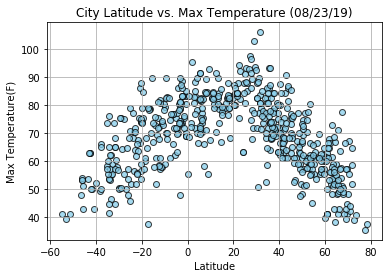

In [71]:
max_temp = clean_df["Max Temp"]
city_lat = clean_df["Lat"]

plt.scatter(city_lat, max_temp, marker="o", facecolors="skyblue", edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title('City Latitude vs. Max Temperature (08/23/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

plt.savefig("MaxTemp.png",bbox_inches = "tight")

plt.show()

#### Latitude vs. Humidity Plot

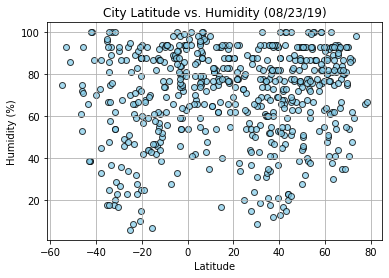

In [72]:
humidity = clean_df["Humidity"]

plt.scatter(city_lat, humidity, marker="o", facecolors="skyblue", edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title('City Latitude vs. Humidity (08/23/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("Humidity.png",bbox_inches = "tight")

plt.show()

#### Latitude vs. Cloudiness Plot

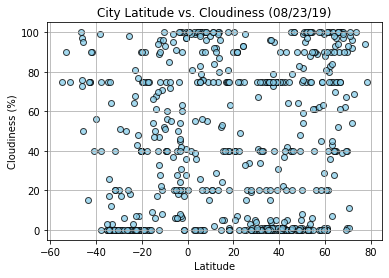

In [73]:
cloudiness = clean_df["Cloudiness"]

plt.scatter(city_lat, cloudiness, marker="o", facecolors="skyblue", edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title('City Latitude vs. Cloudiness (08/23/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("Cloudiness.png",bbox_inches = "tight")

plt.show()

#### Latitude vs. Wind Speed Plot

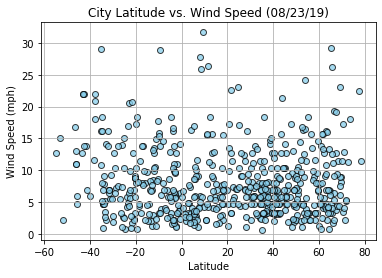

In [74]:
wind_speed = clean_df["Wind Speed"]

plt.scatter(city_lat, wind_speed, marker="o", facecolors="skyblue", edgecolors="black",
            alpha=0.75)
plt.grid()

plt.title('City Latitude vs. Wind Speed (08/23/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("WindSpeed.png",bbox_inches = "tight")

plt.show()